In [22]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
import statsmodels.formula.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

In [2]:
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [3]:
cleansed=load_amihud_markets_price()

tsmom_model.py:158: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('./Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:160: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('./liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


In [4]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:42: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('./Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:44: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('./volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:46: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:46: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:49: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future ve

In [5]:
sector_rtns={}
d_map=sector_map(amihud)
for sect in d_map.keys():
    sector_rtns[sect]=np.log(cleansed[d_map[sect]].resample(rule='m',how='last')).diff().dropna(how='all')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  after removing the cwd from sys.path.


# Presentation to be like "Time Varying Liquidity and Momentum Profits (2015) paper

Rank by deciles, HML (8,9,10) - (1,2,3).  Save monthly returns (equal (risk?) weighted) and if you want to annualized then resample.


Then correlation matrix 
* Overall market vol?
* Market illiquidity (median Amihud through time series)


# Amihud (2002) Annual portfolio sorts

In [6]:
data=calc_zscore_expanding_window(amihud.dropna(how='all'),3).dropna(how='all')
sector_zscores={}
d_map=sector_map(amihud)
for sect in d_map.keys():
    sector_zscores[sect]=data[d_map[sect]].dropna(how='all')

tsmom_model.py:273: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=3,window=100000000,center=False).mean()
  return (df-pd.rolling_mean(df,100000000,min_periods=min_per))/pd.rolling_std(df,100000000,min_periods=min_per)
tsmom_model.py:273: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=3,window=100000000,center=False).std()
  return (df-pd.rolling_mean(df,100000000,min_periods=min_per))/pd.rolling_std(df,100000000,min_periods=min_per)


# Annual portfolio sorts

In [7]:
sector_portfolio_sorts={}
for s in sector_zscores.keys():
    sector_portfolio_sorts[s]=quantile_portfolios_annual(sector_zscores[s],cleansed,2)

tsmom_model.py:238: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  mkts=quantile_columns(rank_data.resample(rule='a',how='median'),year,number_of_buckets,i)
tsmom_model.py:239: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  rtns = price_data.resample(rule='m',how='last')[mkts].pct_change()[str(y+1)].mean(axis=1)


In [9]:
sector_portfolio_sorts_mon={}
for s in sector_zscores.keys():
    sector_portfolio_sorts_mon[s]=quantile_portfolios_monthly(sector_zscores[s],cleansed,2)


tsmom_model.py:251: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  mkts=quantile_columns_monthly(rank_data.resample(rule='m',how='median'),mon,number_of_buckets,i)
/Users/mrefermat/anaconda/lib/python2.7/site-packages/pandas/core/internals.py:3871: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  block = self.blocks[self._blknos[i]]
tsmom_model.py:258: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  rtns = price_data.resample(rule='m',how='last')[mkts].pct_change()[next_mon].mean(axis=1)


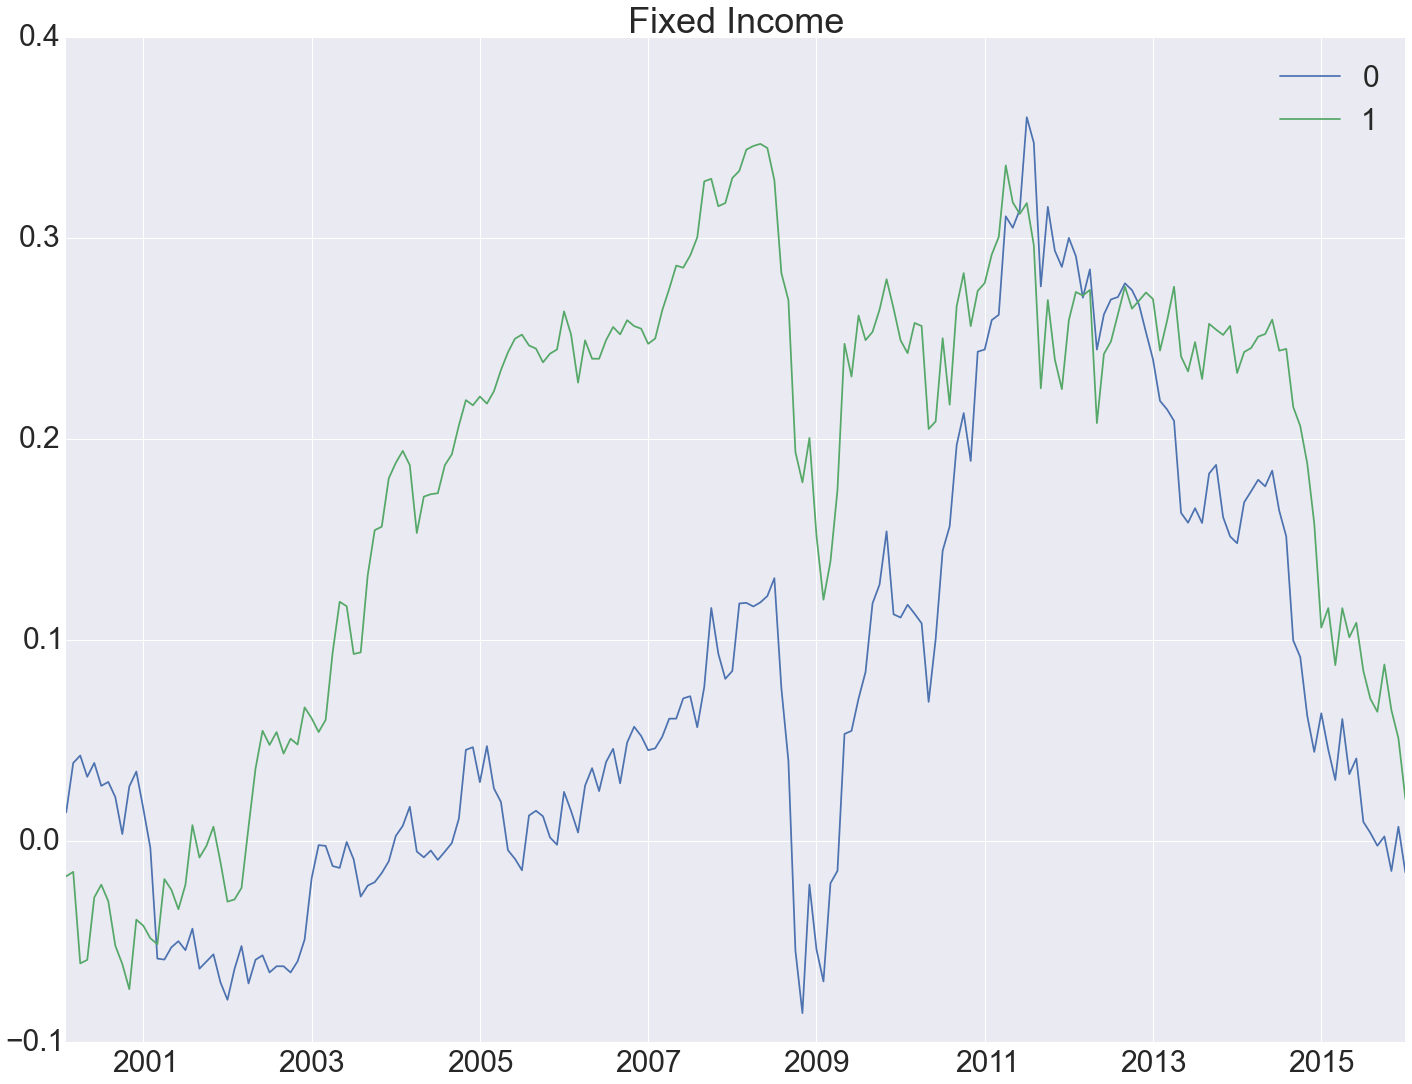

In [16]:
sector_portfolio_sorts_mon['Currencies'].cumsum().plot(title=s)

In [18]:
for s in [sector_portfolio_sorts_mon.keys():
    sector_portfolio_sorts_mon[s].to_pickle('data/'+s+'_monthly.pickle')


In [25]:
data=read_monthly()

In [26]:
data.keys()

['Commodities', 'Equities', 'Fixed Income', 'Currencies']

In [8]:
for sec in sector_zscores.keys():
    print(sec)
    print(portfolio_sort_table(sector_portfolio_sorts[sec],sector_rtns[sec]).to_latex())

Agriculturals
\begin{tabular}{lrrr}
\toprule
{} &      0 &      1 &  Factor \\
\midrule
Monthly Return (in \%)        &   0.68 &   0.93 &    0.26 \\
Standard Deviation           &  15.17 &  15.41 &   12.98 \\
Information Ratio            &   0.53 &   0.73 &    0.24 \\
Skewness                     &  -0.08 &   0.45 &    0.02 \\
Excess Kurtosis              &   1.27 &   4.22 &    2.20 \\
AR(1)                        &  -0.03 &   0.02 &   -0.13 \\
AR(1) Tstat                  &  -0.37 &   0.21 &   -1.82 \\
CAPM Alpha Annualized (in \%) &   4.46 &   7.51 &    3.05 \\
CAPM Alpha Tstat             &   2.97 &   5.03 &    1.07 \\
CAPM Beta (in \%)             &   1.01 &   1.01 &    0.00 \\
CAPM Beta Tstat              &  25.46 &  19.00 &    0.06 \\
R\textasciicircum2                          &   0.81 &   0.79 &    0.00 \\
\bottomrule
\end{tabular}

Currencies
\begin{tabular}{lrrr}
\toprule
{} &      0 &      1 &  Factor \\
\midrule
Monthly Return (in \%)        &  -0.13 &   0.08 &    0.20 \\
S

for sec in sector_:
    print(sec)
    print(portfolio_sort_table(sector_portfolio_sorts[sec],sector_rtns[sec]).to_latex())

In [27]:
FHT=calculate_FHT(cleansed)
data=calc_zscore_expanding_window(FHT.dropna(how='all'),3).dropna(how='all')
sector_zscores={}
d_map=sector_map(FHT)
for sect in d_map.keys():
    sector_zscores[sect]=data[d_map[sect]].dropna(how='all')

tsmom_model.py:283: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  nonzero=x[x==0].resample(rule='m',how='count')
tsmom_model.py:284: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  Z=(nonzero/x.resample(rule='m',how='count')).dropna()
tsmom_model.py:285: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  data[c]=pd.Series(norm.cdf((1+Z)/2.),index=Z.index)*2*pd.rolling_std(x,12).resample(rule='m',how='last')
tsmom_model.py:285: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data[c]=pd.Series(norm.cdf((1+Z)/2.),index=Z.index)*2*pd.rolling_std(x,12).resample(rule='m',how='last')


In [28]:
sector_portfolio_sorts_FHT={}
for s in sector_zscores.keys():
    sector_portfolio_sorts_FHT[s]=quantile_portfolios_annual(sector_zscores[s],cleansed,3)

In [29]:
sector_portfolio_sorts_FHT_mon={}
for s in sector_zscores.keys():
    sector_portfolio_sorts_FHT_mon[s]=quantile_portfolios_monthly(sector_zscores[s],cleansed,3)

In [30]:
for s in sector_portfolio_sorts_mon.keys():
    sector_portfolio_sorts_mon[s].to_pickle('data/'+s+'_monthly_FHT.pickle')

In [11]:
for sec in ['Commodities', 'Equities', 'Fixed Income']:
    print(sec)
    print(portfolio_sort_table(sector_portfolio_sorts_FHT[sec],sector_rtns[sec]).to_latex())

Commodities
\begin{tabular}{lrrrr}
\toprule
{} &      0 &      1 &      2 &  Factor \\
\midrule
Monthly Return (in \%)        &   0.49 &   0.86 &   0.68 &    0.20 \\
Standard Deviation           &  13.27 &  13.64 &  14.02 &   13.79 \\
Information Ratio            &   0.44 &   0.76 &   0.59 &    0.17 \\
Skewness                     &  -0.51 &  -0.03 &  -0.50 &    0.03 \\
Excess Kurtosis              &   4.37 &   2.95 &   3.06 &   -0.04 \\
AR(1)                        &   0.10 &   0.20 &   0.05 &   -0.01 \\
AR(1) Tstat                  &   1.02 &   2.54 &   0.70 &   -0.18 \\
CAPM Alpha Annualized (in \%) &   3.36 &   7.75 &   5.58 &    2.22 \\
CAPM Alpha Tstat             &   2.27 &   4.93 &   3.37 &    0.81 \\
CAPM Beta (in \%)             &   0.96 &   1.00 &   1.01 &    0.05 \\
CAPM Beta Tstat              &  23.56 &  17.22 &  22.30 &    0.59 \\
R\textasciicircum2                          &   0.68 &   0.69 &   0.67 &    0.00 \\
\bottomrule
\end{tabular}

Equities
\begin{tabular}{lrrrr}

# Monthly portoflio sorts

In [12]:
amihud_monthly = read_monthly(amihud=True)

In [13]:
for sec in ['Commodities', 'Equities', 'Fixed Income']:
    print(sec)
    print(portfolio_sort_table(amihud_monthly[sec],sector_rtns[sec]).to_latex())


Commodities
\begin{tabular}{lrrrr}
\toprule
{} &      0 &      1 &      2 &  Factor \\
\midrule
Monthly Return (in \%)        &   0.69 &   0.52 &   0.80 &    0.11 \\
Standard Deviation           &  14.87 &  13.83 &  16.55 &   14.31 \\
Information Ratio            &   0.56 &   0.45 &   0.58 &    0.09 \\
Skewness                     &  -0.35 &  -0.47 &  -0.26 &    0.05 \\
Excess Kurtosis              &   3.14 &   1.66 &   3.03 &    1.01 \\
AR(1)                        &   0.10 &   0.11 &  -0.00 &   -0.29 \\
AR(1) Tstat                  &   0.94 &   1.08 &  -0.04 &   -3.88 \\
CAPM Alpha Annualized (in \%) &   5.96 &   3.97 &   7.00 &    1.03 \\
CAPM Alpha Tstat             &   3.44 &   2.33 &   3.88 &    0.35 \\
CAPM Beta (in \%)             &   0.96 &   0.91 &   1.07 &    0.12 \\
CAPM Beta Tstat              &  23.02 &  21.66 &  21.81 &    1.54 \\
R\textasciicircum2                          &   0.72 &   0.76 &   0.74 &    0.01 \\
\bottomrule
\end{tabular}

Equities
\begin{tabular}{lrrrr}

# Monthly FHT

In [14]:
FHT_monthly = read_monthly(amihud=False)

In [15]:
for sec in ['Commodities', 'Equities', 'Fixed Income']:
    print(sec)
    print(portfolio_sort_table(FHT_monthly[sec],sector_rtns[sec]).to_latex())



Commodities
\begin{tabular}{lrrrr}
\toprule
{} &      0 &      1 &      2 &  Factor \\
\midrule
Monthly Return (in \%)        &   0.78 &   0.62 &   0.53 &   -0.25 \\
Standard Deviation           &  12.49 &  12.73 &  14.76 &   13.41 \\
Information Ratio            &   0.75 &   0.59 &   0.43 &   -0.23 \\
Skewness                     &  -0.08 &  -0.61 &  -0.26 &   -0.14 \\
Excess Kurtosis              &   1.87 &   3.79 &   3.89 &    0.80 \\
AR(1)                        &   0.16 &   0.16 &  -0.01 &   -0.11 \\
AR(1) Tstat                  &   2.17 &   2.02 &  -0.10 &   -1.69 \\
CAPM Alpha Annualized (in \%) &   7.14 &   5.03 &   3.56 &   -3.58 \\
CAPM Alpha Tstat             &   5.03 &   3.76 &   2.36 &   -1.43 \\
CAPM Beta (in \%)             &   0.89 &   0.96 &   1.10 &    0.21 \\
CAPM Beta Tstat              &  17.26 &  36.58 &  26.92 &    3.11 \\
R\textasciicircum2                          &   0.66 &   0.74 &   0.72 &    0.03 \\
\bottomrule
\end{tabular}

Equities
\begin{tabular}{lrrrr}